## Задание

Мы - онлайн магазин спортивных товаров: одежды, обуви, аксессуаров и спорт-питания. На главной странице магазина мы показываем пользователям баннеры с целью стимулирования своих продаж. Сейчас там случайно показывается один из 5 баннеров. Каждый баннер рекламирует конкретный продукт или всю компанию. Наши маркетологи считают, что опыт взаимодействия с баннерами может различаться по сегментам, а их эффективность - зависеть от особенностей пользовательского поведения.

У менеджера компании появилось предложение от партнеров продать это место для баннера и рекламировать там другой сервис (оплата предполагается по CPC-модели).

Помогите менеджеру принять решение.

## Подключение библиотек и скриптов

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams.update({'font.size': 14})

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 50)

In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### Пути к директориям и файлам

In [5]:
DATASET_PATH = '../test_data/ha_data.csv'

## Загрузка данных

Описание датасета: у нас есть информация о том, какой баннер показался пользователю, кликнул ли он на него, а так же информация о покупках пользователей.

∙ **title** - тип события (показ, клик или покупка)  
∙ **user** - уникальный идентификатор клиента  
∙ **product** - продукт баннера/покупки  
∙ **page_id** - уникальный номер страницы для связки событий (NA для покупок)  
∙ **order_id** - уникальный номер покупки (NA для кликов и показов баннера)  
∙ **time** - время совершения действия  
∙ **site_version** - версия сайта (мобильная или десктопная)  

In [6]:
#!cat ../test_data/ha_data.csv | head -10

In [7]:
df = pd.read_csv(DATASET_PATH, sep=';', dtype={'order_id': str, 'page_id': str})
df.head()

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1


#### Приведение типов

In [8]:
df['time'] = pd.to_datetime(df['time'])

## Общая информации о данных

In [9]:
df.head()

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1


In [10]:
df.shape

(8471226, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471226 entries, 0 to 8471225
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   order_id      object        
 1   page_id       object        
 2   product       object        
 3   site_version  object        
 4   time          datetime64[ns]
 5   title         object        
 6   user          object        
dtypes: datetime64[ns](1), object(6)
memory usage: 452.4+ MB


In [12]:
df.nunique()

order_id         248722
page_id         7393319
product               5
site_version          2
time            5799553
title                 3
user            4254621
dtype: int64

In [13]:
df.isna().sum()

order_id        8222504
page_id          248722
product               0
site_version          0
time                  0
title                 0
user                  0
dtype: int64

## Обзор данных

In [14]:
df

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


#### Категориальные переменные

In [15]:
for i in df.select_dtypes(include='object').columns:
    print(str(i) + '\n\n' + str(df[i].value_counts()) + '\n' + '-' * 100 + '\n')

order_id

377694.0    1
705505.0    1
281689.0    1
362842.0    1
175228.0    1
           ..
426525.0    1
552876.0    1
425409.0    1
458029.0    1
314241.0    1
Name: order_id, Length: 248722, dtype: int64
----------------------------------------------------------------------------------------------------

page_id

8316828.0     2
21982309.0    2
22990594.0    2
24059724.0    2
10570133.0    2
             ..
18643518.0    1
22608630.0    1
7245346.0     1
8290652.0     1
96099.0       1
Name: page_id, Length: 7393319, dtype: int64
----------------------------------------------------------------------------------------------------

product

clothes             1786438
company             1725059
sneakers            1703345
sports_nutrition    1634625
accessories         1621759
Name: product, dtype: int64
----------------------------------------------------------------------------------------------------

site_version

mobile     6088340
desktop    2382886
Name: site_version, dtype:

### Метрики

**Conversion Rate** - коэффициент конверсии. Конверсией в интернет-маркетинге называют количественное соотношение пользователей ресурса, которые совершили целевое действие к общему числу посетителей, измеряется в процентах. 

**CTR** - показатель кликабельности. Метрика в интернет-маркетинге, определяется как отношение числа кликов на баннер к числу показов, измеряется в процентах.

### Задача: 

Сравнить конверсии в заказ %product% для групп пользователей в разрезе %product%
1. пользователи, не видевшие баннер %product%
2. пользователи, которые видели баннер %product%

Подсчитаем и сравним конверсии в покупку других типов товаров (!= рассматриваемому выше значению %product%)

In [16]:
df

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


In [17]:
def get_conversion_df(df, suf=''):
    n_users = df['user'].unique().shape[0]
    
    n_orders_df = df[df['title'] == 'order'] \
        .groupby(['product', 'user']).size().reset_index() \
        .groupby('product', sort=True).size().reset_index(name='n_orders'+suf)
    
    conversion_df = n_orders_df.copy()
    conversion_df['n_users'+suf] = n_users
    conversion_df['conversion'+suf] = conversion_df['n_orders'+suf] / conversion_df['n_users'+suf]
    
    return conversion_df

In [18]:
def build_compare_conversion_df(df, banner_product):
    conversion_df = get_conversion_df(df)
    users_seen_banner = df[(df['product'] == banner_product) & (df['title'] == 'banner_show')]['user'].unique()

    seen_conversion_df = get_conversion_df(df[df['user'].isin(users_seen_banner)], '_seen')
    not_seen_conversion_df = get_conversion_df(df[~df['user'].isin(users_seen_banner)], '_not_seen')
    
    result = pd.merge(conversion_df, seen_conversion_df, on='product', how='left')
    result = pd.merge(result, not_seen_conversion_df, on='product', how='left')
    
    gen = lambda s: [s, s+'_seen', s+'_not_seen']
    
    return result[['product'] + gen('conversion') + gen('n_users') + gen('n_orders')].copy()

In [19]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [20]:
build_compare_conversion_df(df, 'accessories')

,product,conversion,conversion_seen,conversion_not_seen,n_users,n_users_seen,n_users_not_seen,n_orders,n_orders_seen,n_orders_not_seen
0,accessories,0.0104,0.0137,0.0091,4254621,1155775,3098846,44160,15818,28342
1,clothes,0.0259,0.0306,0.0242,4254621,1155775,3098846,110347,35402,74945
2,sneakers,0.0157,0.0207,0.0139,4254621,1155775,3098846,66917,23947,42970
3,sports_nutrition,0.0055,0.0074,0.0048,4254621,1155775,3098846,23609,8587,15022


In [21]:
build_compare_conversion_df(df, 'clothes')

,product,conversion,conversion_seen,conversion_not_seen,n_users,n_users_seen,n_users_not_seen,n_orders,n_orders_seen,n_orders_not_seen
0,accessories,0.0104,0.0149,0.0087,4254621,1164914,3089707,44160,17395,26765
1,clothes,0.0259,0.0332,0.0232,4254621,1164914,3089707,110347,38704,71643
2,sneakers,0.0157,0.0225,0.0132,4254621,1164914,3089707,66917,26213,40704
3,sports_nutrition,0.0055,0.0080,0.0046,4254621,1164914,3089707,23609,9346,14263


In [22]:
build_compare_conversion_df(df, 'company')

,product,conversion,conversion_seen,conversion_not_seen,n_users,n_users_seen,n_users_not_seen,n_orders,n_orders_seen,n_orders_not_seen
0,accessories,0.0104,0.0137,0.0090,4254621,1256721,2997900,44160,17174,26986
1,clothes,0.0259,0.0426,0.0189,4254621,1256721,2997900,110347,53571,56776
2,sneakers,0.0157,0.0208,0.0136,4254621,1256721,2997900,66917,26167,40750
3,sports_nutrition,0.0055,0.0073,0.0048,4254621,1256721,2997900,23609,9218,14391


In [23]:
build_compare_conversion_df(df, 'sneakers')

,product,conversion,conversion_seen,conversion_not_seen,n_users,n_users_seen,n_users_not_seen,n_orders,n_orders_seen,n_orders_not_seen
0,accessories,0.0104,0.0141,0.0090,4254621,1163808,3090813,44160,16437,27723
1,clothes,0.0259,0.0316,0.0238,4254621,1163808,3090813,110347,36815,73532
2,sneakers,0.0157,0.0206,0.0139,4254621,1163808,3090813,66917,23923,42994
3,sports_nutrition,0.0055,0.0076,0.0048,4254621,1163808,3090813,23609,8859,14750


In [24]:
build_compare_conversion_df(df, 'sports_nutrition')

,product,conversion,conversion_seen,conversion_not_seen,n_users,n_users_seen,n_users_not_seen,n_orders,n_orders_seen,n_orders_not_seen
0,accessories,0.0104,0.0137,0.0091,4254621,1173163,3081458,44160,16110,28050
1,clothes,0.0259,0.0307,0.0241,4254621,1173163,3081458,110347,35964,74383
2,sneakers,0.0157,0.0208,0.0138,4254621,1173163,3081458,66917,24436,42481
3,sports_nutrition,0.0055,0.0075,0.0048,4254621,1173163,3081458,23609,8823,14786


In [25]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Выводы:
1. Большая часть заказов делается пользователями, не видевшими баннер соответствующего продукта
2. В группах, видевших баннер более высокая конверсия в заказ любых продуктов 

### Задача:
Проанализируем в целом переменные %page_id% и конверсии по типу действия %title%
1. найдем связь переменной %page_id% для групп пользователей в разрезе %user, product%
2. узнаем количество уникальных пользователей, совершивших покупки, клики, просмотры

In [26]:
df[(df['user'] == 'user_758367')][:10]

,order_id,page_id,product,site_version,time,title,user
1799102,NaN,3831378.0,sneakers,desktop,2017-02-09 17:51:36,banner_show,user_758367
1799103,NaN,3837400.0,company,desktop,2017-02-12 03:50:09,banner_show,user_758367
1799104,NaN,3864676.0,sports_nutrition,desktop,2017-02-13 18:58:04,banner_show,user_758367
1799105,NaN,3890988.0,sports_nutrition,desktop,2017-02-04 07:07:19,banner_show,user_758367
1799106,NaN,3896055.0,company,desktop,2017-02-01 18:06:15,banner_show,user_758367
1799107,NaN,3901442.0,sports_nutrition,desktop,2017-01-25 09:46:06,banner_show,user_758367
1799108,NaN,3907355.0,company,desktop,2017-01-30 12:44:22,banner_show,user_758367
1799109,NaN,4032823.0,sneakers,desktop,2017-01-30 16:20:15,banner_show,user_758367
1799110,NaN,4054845.0,sneakers,desktop,2017-02-10 06:03:24,banner_show,user_758367
1799111,NaN,4072375.0,accessories,desktop,2017-02-20 12:47:18,banner_show,user_758367


In [28]:
df[(df['page_id'] == '3890988.0')]

,order_id,page_id,product,site_version,time,title,user
1799105,NaN,3890988.0,sports_nutrition,desktop,2017-02-04 07:07:19,banner_show,user_758367


In [29]:
df[(df['page_id'] == '3864676.0')]

,order_id,page_id,product,site_version,time,title,user
1799104,NaN,3864676.0,sports_nutrition,desktop,2017-02-13 18:58:04,banner_show,user_758367


Видим, что page_id отличается для одного того же юзера и продукта и в том же месяце

In [30]:
n_users_with_order = df[pd.notna(df['order_id'])]['user'].unique().shape[0]
n_users_by_click = df[(df['title'] == 'banner_click')]['user'].unique().shape[0]
n_users_by_banner_show = df[(df['title'] == 'banner_show')]['user'].unique().shape[0]

In [31]:
print(n_users_with_order, n_users_by_click, n_users_by_banner_show, sep='\n')

237866
742459
4254621


In [32]:
def percent_n_users(n_users_by_action):
    n_users = df['user'].unique().shape[0] 
    
    conversion = (n_users_by_action / n_users) * 100
    return conversion

In [33]:
print(f'Процент пользователей, совершивших заказ, от всего числа пользователей - {percent_n_users(n_users_with_order)}')
print(f'Процент пользователей, кликнувших на объявление, от всего числа пользователей - {percent_n_users(n_users_by_click)}')
print(f'Процент пользователей, просмотревших объявление, от всего числа пользователей - {percent_n_users(n_users_by_banner_show)}')

Процент пользователей, совершивших заказ, от всего числа пользователей - 5.590768249392837
Процент пользователей, кликнувших на объявление, от всего числа пользователей - 17.450649540816915
Процент пользователей, просмотревших объявление, от всего числа пользователей - 100.0


Получается, каждый пользователь хотя бы раз просмотрел баннер и дальше уже либо кликнул по нему либо совершил покупку

### Задача:
Проверить эффективность баннеров на мобильной и десктопной версии

In [34]:
df

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


In [35]:
df.groupby(['site_version']).size().reset_index(name='count')

,site_version,count
0,desktop,2382886
1,mobile,6088340


В таблице выше мы видим количество всех действий в мобильной версии и десктоп. Пользователи совершают действия охотнее в мобильной версии, чем на сайте.

In [36]:
df_site_version = df.groupby(['site_version', 'title']).size().reset_index(name='count') 
df_site_version

,site_version,title,count
0,desktop,banner_click,115065
1,desktop,banner_show,2134640
2,desktop,order,133181
3,mobile,banner_click,714120
4,mobile,banner_show,5258679
5,mobile,order,115541


In [37]:
def get_count(df, site_version, title):
    tmp_df = df[(df['site_version'] == site_version) & (df['title'] == title)]
    assert tmp_df.shape[0] == 1
    return tmp_df['count'].iloc[0]

In [38]:
#CTR - клики к просмотрам

CTR_mobile = (get_count(df_site_version, 'mobile', 'banner_click') / 
              get_count(df_site_version, 'mobile', 'banner_show')) * 100 

CTR_desktop = (get_count(df_site_version, 'desktop', 'banner_click') / 
              get_count(df_site_version, 'desktop', 'banner_show')) * 100

In [39]:
print(CTR_mobile, CTR_desktop, sep='\n' )

13.579836304897105
5.390370273207661


In [40]:
#CR - общее количество заказов к просмотрам

order_to_show_mobile = (get_count(df_site_version, 'mobile', 'order') / 
                        get_count(df_site_version, 'mobile', 'banner_show')) * 100

order_to_show_desktop = (get_count(df_site_version, 'desktop', 'order') / 
                         get_count(df_site_version, 'desktop', 'banner_show')) * 100

In [41]:
print(order_to_show_mobile, order_to_show_desktop, sep='\n' )

2.197148751616138
6.239037964246899


In [42]:
#CR - общее количество заказов к кликам

order_to_click_mobile = (get_count(df_site_version, 'mobile', 'order') / 
                         get_count(df_site_version, 'mobile', 'banner_click')) * 100

order_to_click_desktop = (get_count(df_site_version, 'desktop', 'order') / 
                         get_count(df_site_version, 'desktop', 'banner_click')) * 100

In [43]:
print(order_to_click_mobile, order_to_click_desktop, sep='\n' )

16.179493642525067
115.74414461391387


Мы видим, что **общее количество заказов через сайт больше, чем количество кликов по баннерам**. Из этого мы можем сделать вывод, что продажа может быть и без клика.

Узнаем количество пользователей мобильной версии и десктоп  

In [44]:
n_users_by_desktop = df[(df['site_version'] == 'desktop')]['user'].unique().shape[0]
n_users_by_desktop 

1424772

In [45]:
n_users_by_mobile = df[(df['site_version'] == 'mobile')]['user'].unique().shape[0]
n_users_by_mobile

2857189

#### Суммарное количество пользователей на обоих устройствах

In [46]:
sum_users_by_site = n_users_by_mobile + n_users_by_desktop 
sum_users_by_site

4281961

**4281961 > 4254621** - мы видим, что пользователей по типу устройств больше, чем суммарное количество уникальных пользователей, значит некоторые пользователи совершали действия и на мобильном устройстве и декстоп

#### Далее рассмотрим количество уникальных пользовательских действий в зависимости от устройства 

In [47]:
df_users_actions = df.groupby(['site_version', 'title', 'user']).size().reset_index()  \
      .groupby(['site_version', 'title']).size()                                       \
      .reset_index(name='count')                                                       \
      .sort_values(['title'], ascending=[False])                                       \
      .reset_index(drop = True)

df_users_actions

,site_version,title,count
0,desktop,order,125404
1,mobile,order,112574
2,desktop,banner_show,1424772
3,mobile,banner_show,2857189
4,desktop,banner_click,111334
5,mobile,banner_click,631645


In [48]:
df_users_actions['users_site_version'] = n_users_by_mobile

In [49]:
df_users_actions.loc[df_users_actions['site_version'] \
                     .isin(['desktop']), 'users_site_version'] = n_users_by_desktop

In [50]:
df_users_actions

,site_version,title,count,users_site_version
0,desktop,order,125404,1424772
1,mobile,order,112574,2857189
2,desktop,banner_show,1424772,1424772
3,mobile,banner_show,2857189,2857189
4,desktop,banner_click,111334,1424772
5,mobile,banner_click,631645,2857189


#### Считаем конверсию по каждому действию в мобильной версии и декстоп

In [51]:
df_users_actions['conversion_rate'] = (df_users_actions['count'] / df_users_actions['users_site_version']) * 100

In [52]:
df_users_actions.sort_values(['title'], ascending=[False]) \
    [['site_version', 'title','conversion_rate']].reset_index(drop = True)

,site_version,title,conversion_rate
0,desktop,order,8.80
1,mobile,order,3.94
2,desktop,banner_show,100.00
3,mobile,banner_show,100.00
4,desktop,banner_click,7.81
5,mobile,banner_click,22.11


In [53]:
df_users_actions = df_users_actions.drop([2, 3])

In [54]:
df_users_actions[['site_version', 'title', 'conversion_rate']]

,site_version,title,conversion_rate
0,desktop,order,8.80
1,mobile,order,3.94
4,desktop,banner_click,7.81
5,mobile,banner_click,22.11


In [55]:
df_users_actions['title_site_version'] = df_users_actions['site_version'] \
    .str.cat(df_users_actions['title'], sep=' - ')

In [56]:
df_users_actions

,site_version,title,count,users_site_version,conversion_rate,title_site_version
0,desktop,order,125404,1424772,8.80,desktop - order
1,mobile,order,112574,2857189,3.94,mobile - order
4,desktop,banner_click,111334,1424772,7.81,desktop - banner_click
5,mobile,banner_click,631645,2857189,22.11,mobile - banner_click


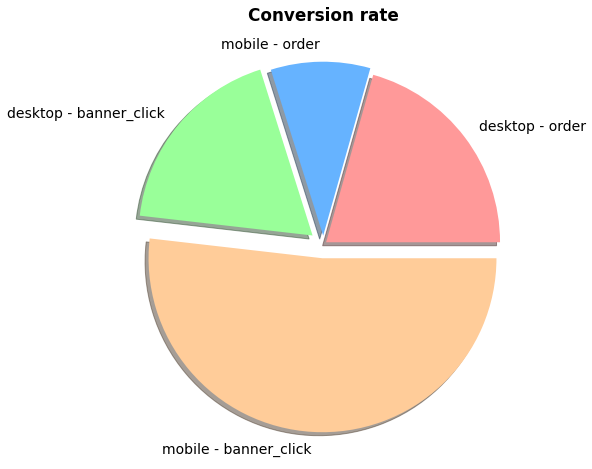

In [57]:
labels = df_users_actions['title_site_version']
explode = [0.02, 0.05, 0.08, 0.08]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

df_users_actions['conversion_rate'].plot(kind='pie', subplots=True, figsize=(8, 8), colors=colors \
                                        ,explode=explode, labels=labels, shadow=True)
           
plt.title("Conversion rate", weight='bold')
plt.ylabel("")

plt.show()

Вывод: 
1. Пользователи в любом случае просматривают баннер и совершают какие-либо действия, либо сначала совершают заказ/клик и потом просматривают баннер.  

2. Заказов совершается значительно больше с десктоп версии сайта в отличии от мобильной. Но кликают охотнее в мобильной версии сайта. Думаю, мы можем отдать место под CPC именно на мобильной версии

### Задача:

Посмотрим какие действия совершают уникальные пользователи магазина, исходя из типа продукта на баннере

In [58]:
df['product'].value_counts()

clothes             1786438
company             1725059
sneakers            1703345
sports_nutrition    1634625
accessories         1621759
Name: product, dtype: int64

In [59]:
n_users_product_type = df.groupby(['product', 'title', 'user']).size().reset_index()  \
        .groupby(['product', 'title']).size()                                    \
        .reset_index(name='count')                                               \
        .sort_values(['product'], ascending=[False])                             \
        .reset_index(drop = True)

n_users_product_type 

,product,title,count
0,sports_nutrition,banner_click,139854
1,sports_nutrition,banner_show,1173163
2,sports_nutrition,order,23609
3,sneakers,banner_click,174802
4,sneakers,banner_show,1163808
5,sneakers,order,66917
6,company,banner_click,140683
7,company,banner_show,1256721
8,clothes,banner_click,210109
9,clothes,banner_show,1164914


In [60]:
all_products = df.groupby(['product', 'user']).size().reset_index() \
        .groupby('product').size() \
        .reset_index(name='n_users')

all_products

,product,n_users
0,accessories,1184117
1,clothes,1236557
2,company,1256721
3,sneakers,1206802
4,sports_nutrition,1187949


Посчитаем конверсию в действие по типу продукта на баннере, для этого поделим число уникальных действий пользователей на общее количество действий по баннеру каждого типа в этих группах

In [61]:
merged_product_type = pd.merge(n_users_product_type, all_products, on='product')
merged_product_type

,product,title,count,n_users
0,sports_nutrition,banner_click,139854,1187949
1,sports_nutrition,banner_show,1173163,1187949
2,sports_nutrition,order,23609,1187949
3,sneakers,banner_click,174802,1206802
4,sneakers,banner_show,1163808,1206802
5,sneakers,order,66917,1206802
6,company,banner_click,140683,1256721
7,company,banner_show,1256721,1256721
8,clothes,banner_click,210109,1236557
9,clothes,banner_show,1164914,1236557


In [62]:
merged_product_type['conversion_rate'] = (merged_product_type['count'] / merged_product_type['n_users']) * 100

In [63]:
merged_product_type.sort_values(['conversion_rate'], ascending=[False]).reset_index(drop = True)

,product,title,count,n_users,conversion_rate
0,company,banner_show,1256721,1256721,100.00
1,sports_nutrition,banner_show,1173163,1187949,98.76
2,accessories,banner_show,1155775,1184117,97.61
3,sneakers,banner_show,1163808,1206802,96.44
4,clothes,banner_show,1164914,1236557,94.21
5,clothes,banner_click,210109,1236557,16.99
6,sneakers,banner_click,174802,1206802,14.48
7,sports_nutrition,banner_click,139854,1187949,11.77
8,company,banner_click,140683,1256721,11.19
9,accessories,banner_click,131998,1184117,11.15


Мы видим, что параметр %banner_show% почти везде одинаковый, но баннеры с логотипом компании просматривают всегда. 

Предположим, наш средний чек одинаковый по каждой категории товаров, а средняя стоимость за клик за медийную рекламу составляет (баннеры) - 43 рубля по курсу на март 2021. Возьмем эти значения и умножим на конверсии, которые получились выше.

In [64]:
merged_product_type.sort_values(['title'], ascending=[False]) \
    .reset_index(drop = True)

merged_product_type

,product,title,count,n_users,conversion_rate
0,sports_nutrition,banner_click,139854,1187949,11.77
1,sports_nutrition,banner_show,1173163,1187949,98.76
2,sports_nutrition,order,23609,1187949,1.99
3,sneakers,banner_click,174802,1206802,14.48
4,sneakers,banner_show,1163808,1206802,96.44
5,sneakers,order,66917,1206802,5.54
6,company,banner_click,140683,1256721,11.19
7,company,banner_show,1256721,1256721,100.00
8,clothes,banner_click,210109,1236557,16.99
9,clothes,banner_show,1164914,1236557,94.21


In [65]:
def check_income(click_price, order_price, convertion_into_click, conversion_in_order, n_users):
    a = click_price * n_users * (convertion_into_click / 100)
    b = order_price * n_users * (conversion_in_order / 100)

    print(f'{round(a)} - доход CPC, {round(b)} - доход от продажи товаров через баннер')   
    print('Отдавать место под CPC невыгодно') if a < b else print('Отдавать место под CPC выгодно')

In [66]:
#clothes
check_income(43, 1000, 16.99, 8.92, 1236557)

9033914 - доход CPC, 110300884 - доход от продажи товаров через баннер
Отдавать место под CPC невыгодно


In [67]:
#accessories
check_income(43, 1000, 11.15, 3.73, 1184117)

5677249 - доход CPC, 44167564 - доход от продажи товаров через баннер
Отдавать место под CPC невыгодно


In [68]:
#sneakers
check_income(43, 1000, 11.19, 5.54, 1206802)

5806769 - доход CPC, 66856831 - доход от продажи товаров через баннер
Отдавать место под CPC невыгодно


In [69]:
#sports_nutrition
check_income(43, 1000, 11.77, 1.99, 1187949)

6012329 - доход CPC, 23640185 - доход от продажи товаров через баннер
Отдавать место под CPC невыгодно


Выводы:  
1. Данные из сводки выше подводят нас к мысли, что не совсем ясно, что именно подразумеватеся под типом продукта в разрезе баннеров или покупки. Если через баннер с определенным типом товара - покупают именно тот же товар, то пользователи не покупают через баннер про компанию, потому что нет такого товара как компания.  

- Если при покупке через определенный баннер может быть любой товар, то тогда можно сделать вывод, что пользователи не совершают покупки, когда видят баннеры о компании, то есть такой тип баннеров даёт нулевую вовлеченность.

- Но когда мы анализируем тип события(просмотр/клик/заказ), то видим, что у нас в описании датасета для значения order именно тип продукта, а не тип баннера. Значит тип баннера не равен типу продукта.

2. Пользователи совершают больше всего покупок, когда видят рекламу позиций из категории @clothes@


3. Также по типу действия @banner_click@ лидируют баннеры типа @clothes@ и @sneakers@, но мы можем заметить, что все остальные категории баннеров вызывают у пользователей примерно одинаковый интерес. 


4. По типу продукта - меньше всего совершают заказов через баннеров с аксессуары и спортивным питанием. Обычно стоимость таких товаров меньше чем цена кроссовок и одежды, и, вероятно, нам также выгоднее продать это место партнеру или заменить на другие баннеры для нас.

### Time

Добавим новый столбец **месяц** и изучим поведение пользователей в разрезе будних дней и выходных.

In [70]:
df['month'] = df['time'].dt.month_name()

Столбец **time** можно удалить за ненадобностью

In [71]:
df.drop("time", axis=1, inplace=True)

In [72]:
df.head()

,order_id,page_id,product,site_version,title,user,month
0,NaN,3.0,company,mobile,banner_show,user_0,February
1,NaN,3699687.0,company,mobile,banner_show,user_0,February
2,NaN,14.0,sneakers,mobile,banner_show,user_1,January
3,NaN,10362176.0,company,mobile,banner_show,user_1,April
4,NaN,14.0,sneakers,mobile,banner_click,user_1,January


In [73]:
df['month'].value_counts()

May         2130108
April       1960088
March       1650715
January     1461098
February    1269217
Name: month, dtype: int64

In [74]:
total_months = df.groupby(['month', 'user']).size().reset_index() \
        .groupby('month').size() \
        .reset_index(name='n_users')

total_months

,month,n_users
0,April,1202590
1,February,805519
2,January,864105
3,March,1026910
4,May,1230277


Отсюда мы узнаем, что наш датасет охватывает 5 месяцев

In [75]:
df_months = df.groupby(['month', 'title', 'user']).size().reset_index()  \
      .groupby(['month', 'title']).size()                                \
      .reset_index(name='count')                                         \
      .sort_values(['title'], ascending=[False])                         \
      .reset_index(drop = True)

df_months

,month,title,count
0,April,order,62086
1,February,order,42971
2,January,order,34648
3,March,order,53477
4,May,order,51424
5,April,banner_show,1178869
6,February,banner_show,786541
7,January,banner_show,855765
8,March,banner_show,1006185
9,May,banner_show,1217483


In [76]:
merged_months = pd.merge(df_months, total_months, on='month')
merged_months

,month,title,count,n_users
0,April,order,62086,1202590
1,April,banner_show,1178869,1202590
2,April,banner_click,178151,1202590
3,February,order,42971,805519
4,February,banner_show,786541,805519
5,February,banner_click,115283,805519
6,January,order,34648,864105
7,January,banner_show,855765,864105
8,January,banner_click,134111,864105
9,March,order,53477,1026910


In [77]:
merged_months['conversion'] = (merged_months['count'] / merged_months['n_users']) * 100

In [78]:
merged_months.sort_values(['conversion'], ascending=[False]).reset_index(drop=True)

,month,title,count,n_users,conversion
0,January,banner_show,855765,864105,99.03
1,May,banner_show,1217483,1230277,98.96
2,April,banner_show,1178869,1202590,98.03
3,March,banner_show,1006185,1026910,97.98
4,February,banner_show,786541,805519,97.64
5,May,banner_click,194977,1230277,15.85
6,January,banner_click,134111,864105,15.52
7,April,banner_click,178151,1202590,14.81
8,March,banner_click,150278,1026910,14.63
9,February,banner_click,115283,805519,14.31


Выводы:  

Cезонность влияет на количество продаж. Зимой абсолютное число продаж, а так же конверсия в покупку ниже, чем весной. Значит мы можем отдать баннерное место под CPC в Январе и Феврале